## Collecting Data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
loan_data=pd.read_csv('C:/Users/sanaa/Dropbox/PC/Desktop/UB/Resume/Python/Data/archive/Loan.csv')
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
print('# of Loan Id in original data:' + str(len(loan_data.index)))

# of Loan Id in original data:614


## Analyzing Data

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

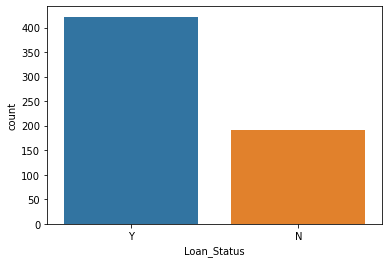

In [7]:
sns.countplot(x="Loan_Status",data=loan_data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

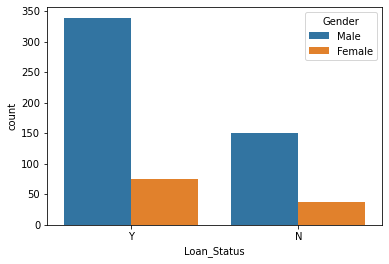

In [8]:
sns.countplot(x="Loan_Status", hue="Gender",data=loan_data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

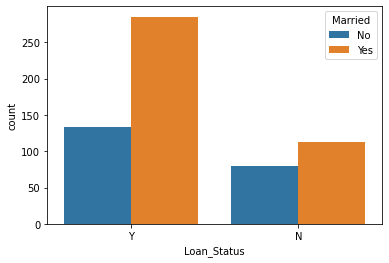

In [9]:
sns.countplot(x="Loan_Status", hue="Married",data=loan_data)

<AxesSubplot:ylabel='Frequency'>

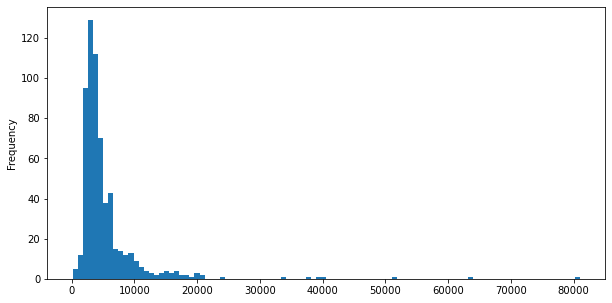

In [18]:
loan_data["ApplicantIncome"].plot.hist(bins=100,figsize=(10,5))

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Wrangling

In [20]:
loan_data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
loan_data.dropna(inplace=True)

<AxesSubplot:>

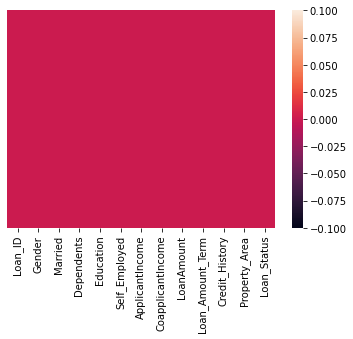

In [28]:
sns.heatmap(loan_data.isnull(),yticklabels=False)

In [32]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
gender=pd.get_dummies(loan_data["Gender"],drop_first=True)
gender.head(5)

,Male
1,1
2,1
3,1
4,1
5,1


In [40]:
married=pd.get_dummies(loan_data["Married"],drop_first=True)
married.head(5)

,Yes
1,1
2,1
3,1
4,0
5,1


In [47]:
education=pd.get_dummies(loan_data["Education"],drop_first=True)
education.head(5)

,Not Graduate
1,0
2,0
3,1
4,0
5,0


In [50]:
self_employed=pd.get_dummies(loan_data["Self_Employed"],drop_first=True)
self_employed.head(5)

,Yes
1,0
2,1
3,0
4,0
5,1


In [52]:
property_area=pd.get_dummies(loan_data["Property_Area"],drop_first=True)
property_area.head()

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [54]:
loan_status=pd.get_dummies(loan_data["Loan_Status"],drop_first=True)
loan_status.head(5)

,Y
1,0
2,1
3,1
4,1
5,1


In [56]:
dependents=pd.get_dummies(loan_data["Dependents"],drop_first=True)
dependents.head(5)

,1,2,3+
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0


In [57]:
loan_data=pd.concat([loan_data,gender,married,education,self_employed,property_area,loan_status,dependents],axis=1)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y,1,2,3+
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,1,1,0,0,0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,1,0,1,0,1,1,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,1,1,1,0,0,1,1,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,0,0,0,0,1,1,0,0,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,1,1,0,1,0,1,1,0,1,0


In [58]:
loan_data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [59]:
loan_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y,1,2,3+
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,0,0,0
5,LP001011,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1,0,1,0


In [101]:
cols = []
count = 1
for column in loan_data.columns:
    if column == 'Yes':
        cols.append(f'Loan_{count}')
        count+=1
        continue
    cols.append(column)
loan_data.columns = cols

In [107]:
loan_data=loan_data.rename({'Y':'Loan_Status(Approved)'},axis=1)
loan_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Loan_1,Not Graduate,Loan_2,Semiurban,Urban,Loan_Status(Approved),1,2,3+
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,0,0,0
5,LP001011,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1,0,1,0


In [109]:
loan_data=loan_data.rename({'Loan_2':'Self_Employed'},axis=1)
loan_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married(Y),Not Graduate,Self_Employed,Semiurban,Urban,Loan_Status(Approved),1,2,3+
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,0,0,0
5,LP001011,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1,0,1,0


In [110]:
loan_data=loan_data.rename({'Married(Y)':'Married'},axis=1)
loan_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married,Not Graduate,Self_Employed,Semiurban,Urban,Loan_Status(Approved),1,2,3+
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,0,0,0
5,LP001011,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1,0,1,0


## Train Data

In [114]:
X=loan_data.drop("Loan_Status(Approved)",axis=1)
y=loan_data["Loan_Status(Approved)"]

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [118]:
from sklearn.linear_model import LogisticRegression

In [121]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [122]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [123]:
predictions=logmodel.predict(X_test)

In [124]:
from sklearn.metrics import classification_report

In [125]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.45      0.59        51\n           1       0.76      0.96      0.85        93\n\n    accuracy                           0.78       144\n   macro avg       0.81      0.70      0.72       144\nweighted avg       0.79      0.78      0.76       144\n'

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
confusion_matrix(y_test,predictions)

array([[23, 28],
       [ 4, 89]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score

### Accuracy Check

In [129]:
accuracy_score(y_test,predictions)

0.7777777777777778